In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import seed
seed(1337)
import tensorflow
#tensorflow.random.set_seed(42)
#from tensorflow import set_random_seed
#set_random_seed(42)

from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [ ]:
train_data_dir = "/content/drive/MyDrive/Solar Module Diagnosis/Final Dataset/Train"
val_data_dir = "/content/drive/MyDrive/Solar Module Diagnosis/Final Dataset/Validation"
test_data_dir = "/content/drive/MyDrive/Solar Module Diagnosis/Final Dataset/Test"
category_names = sorted(os.listdir('/content/drive/MyDrive/Solar Module Diagnosis/Final Dataset/Train'))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = '/content/drive/MyDrive/Solar Module Diagnosis/Final Dataset/Train' + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

Model Building

In [ ]:
img_height, img_width = 224,224
conv_base = vgg16.VGG16(weights='imagenet', include_top=False, pooling='max', input_shape = (img_width, img_height, 3))

In [ ]:
for layer in conv_base.layers:
    print(layer, layer.trainable)

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Dense(nb_categories, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 4)                 2052      
                                                                 
Total params: 14,716,740
Trainable params: 14,716,740
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Number of images to load at each iteration
batch_size = 32
# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255
)
test_datagen =  ImageDataGenerator(
    rescale=1./255
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical")
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,

target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)


Total number of images for "training":
Found 2310 images belonging to 4 classes.
Total number of images for "validation":
Found 665 images belonging to 4 classes.
Total number of images for "testing":
Found 665 images belonging to 4 classes.


In [ ]:
learning_rate = 5e-5
epochs = 30
checkpoint = ModelCheckpoint("Solar_module_without_augm_2.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate, clipnorm = 1.), metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
learning_rate = 0.001
epochs = 30
checkpoint = ModelCheckpoint("Solar_module_without_augm_2.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=learning_rate, clipnorm = 1.), metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
learning_rate = 0.01
epochs = 30
checkpoint = ModelCheckpoint("Solar_module_without_augm_2.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adagrad(lr=learning_rate, clipnorm = 1.), metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


In [ ]:
learning_rate = 0.01
epochs = 30
checkpoint = ModelCheckpoint("Solar_module_without_augm_2.h5", monitor = 'val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(lr=learning_rate, clipnorm = 1.), metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
learning_rate = 0.0001
epochs = 30
checkpoint = ModelCheckpoint("Solar_module_without_augm_2.h5", monitor = 'val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(lr=learning_rate, clipnorm = 1.), metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(train_generator,
                              epochs=epochs,
                              shuffle=True,
                              validation_data=val_generator,
                              callbacks=[checkpoint]
                              )

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


73/73 [==============================] - ETA: 0s - loss: 1.0327 - acc: 0.5502
Epoch 1: val_acc improved from -inf to 0.64962, saving model to Solar_module_without_augm_2.h5
73/73 [==============================] - 37s 490ms/step - loss: 1.0327 - acc: 0.5502 - val_loss: 0.9345 - val_acc: 0.6496
Epoch 2/30
73/73 [==============================] - ETA: 0s - loss: 0.9111 - acc: 0.5961
Epoch 2: val_acc improved from 0.64962 to 0.67820, saving model to Solar_module_without_augm_2.h5
73/73 [==============================] - 35s 481ms/step - loss: 0.9111 - acc: 0.5961 - val_loss: 0.8442 - val_acc: 0.6782
Epoch 3/30
73/73 [==============================] - ETA: 0s - loss: 0.8565 - acc: 0.6338
Epoch 3: val_acc did not improve from 0.67820
73/73 [==============================] - 34s 471ms/step - loss: 0.8565 - acc: 0.6338 - val_loss: 0.8380 - val_acc: 0.6647
Epoch 4/30
73/73 [==============================] - ETA: 0s - loss: 0.7940 - acc: 0.6710
Epoch 4: val_acc improved from 0.67820 to 0.71729,

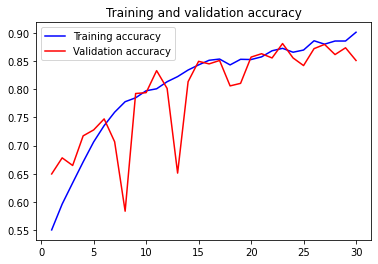

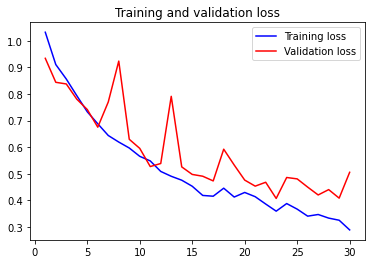

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('Accuracy_augm_2.jpg')
plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Loss_augm_2.jpg')

In [ ]:
model = models.load_model('/content/Solar_module_without_augm_2.h5')

In [ ]:
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

accuracy = accuracy_score(test_generator.classes, y_pred)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy in test set: 85.7% 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


Confusion Matrix


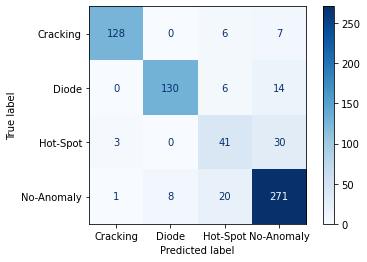

Classification Report
              precision    recall  f1-score   support

    Cracking       0.97      0.91      0.94       141
       Diode       0.94      0.87      0.90       150
    Hot-Spot       0.56      0.55      0.56        74
  No-Anomaly       0.84      0.90      0.87       300

    accuracy                           0.86       665
   macro avg       0.83      0.81      0.82       665
weighted avg       0.86      0.86      0.86       665



In [ ]:
num_of_test_samples = 665
classes = ['Cracking', 'Diode', 'Hot-Spot', 'No-Anomaly']

Y_pred = model.predict_generator(test_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=classes))

In [ ]:
test_subset_data_dir = "/content/drive/MyDrive/Solar Module Diagnosis/Final Dataset/Test_Subset"

test_subset_generator = test_datagen.flow_from_directory(
test_subset_data_dir,
batch_size = batch_size,
target_size = (img_height, img_width),
class_mode = "categorical",
shuffle=False)

Found 47 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


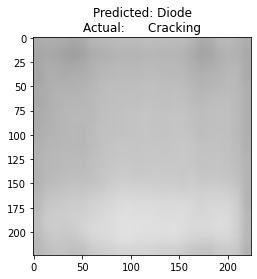

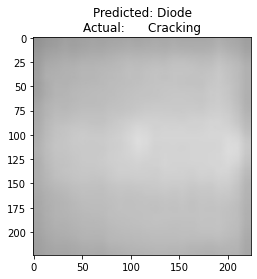

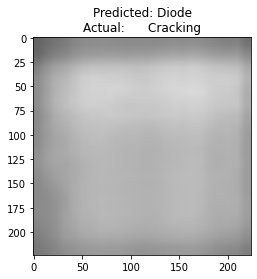

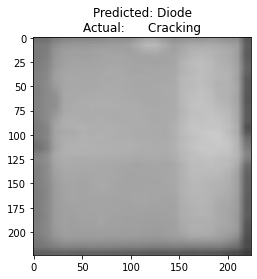

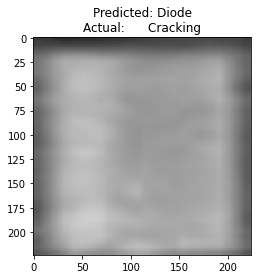

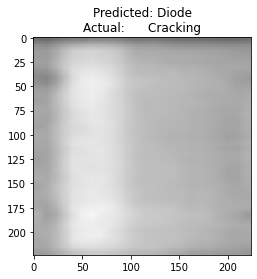

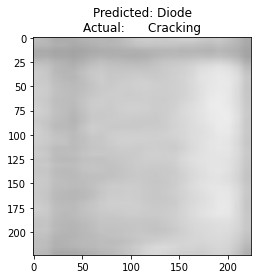

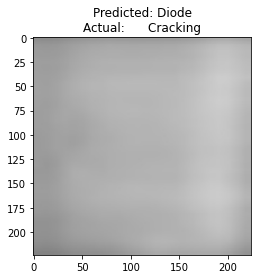

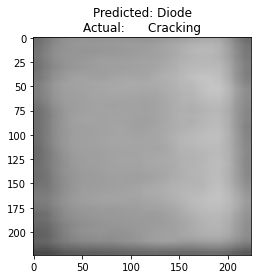

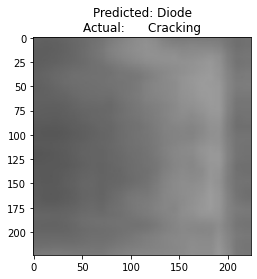

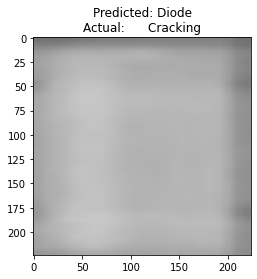

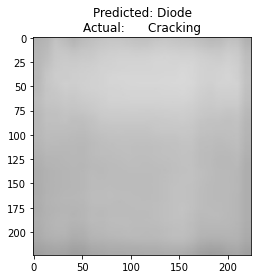

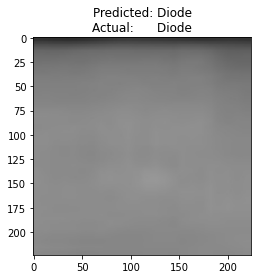

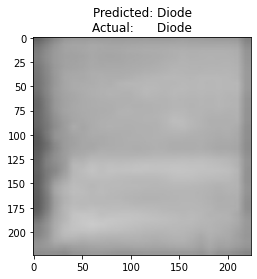

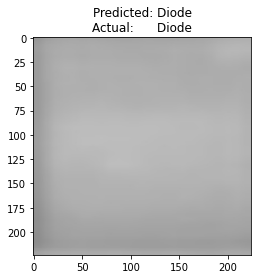

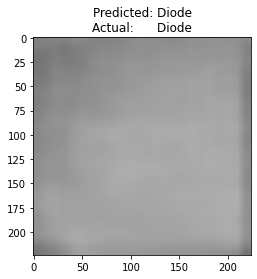

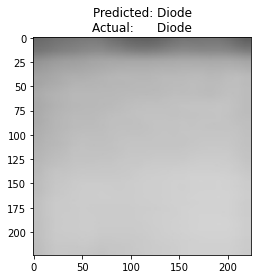

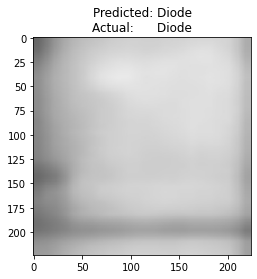

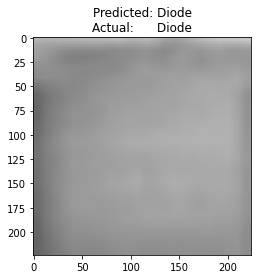

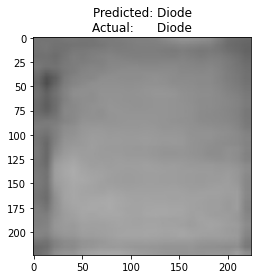

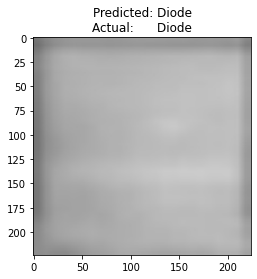

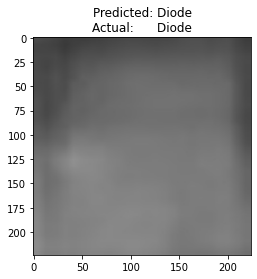

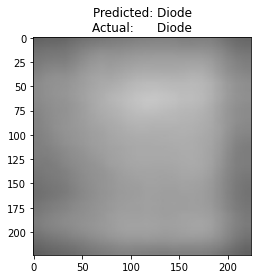

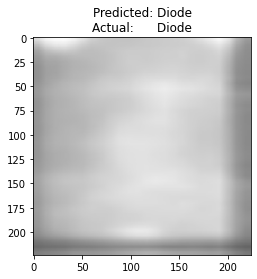

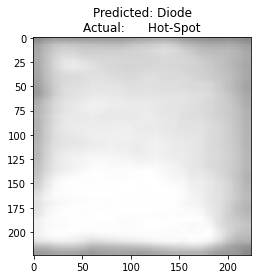

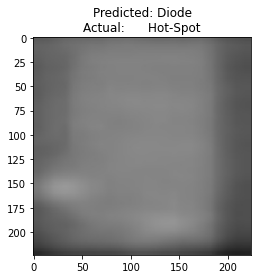

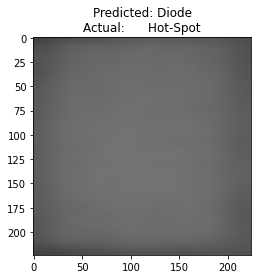

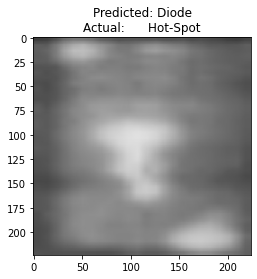

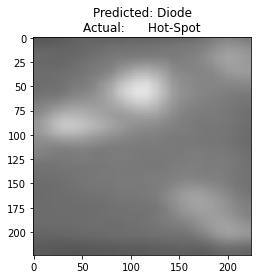

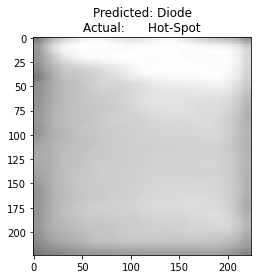

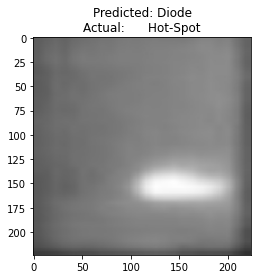

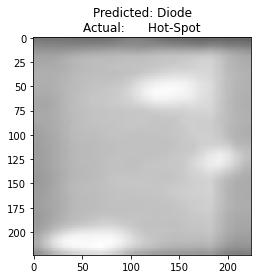

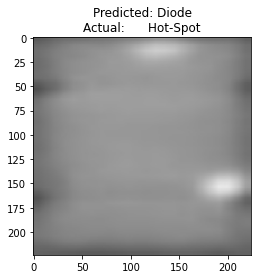

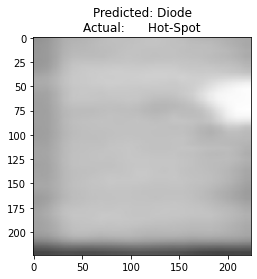

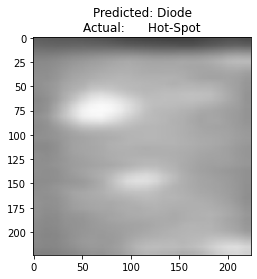

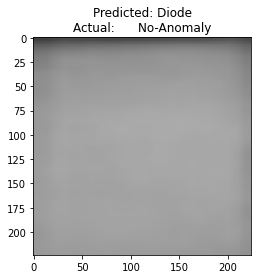

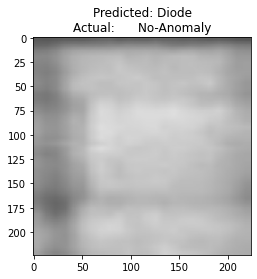

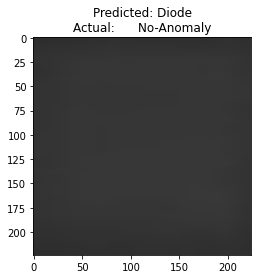

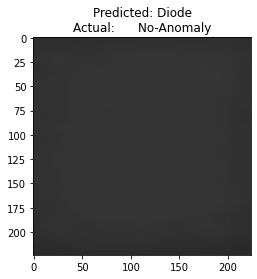

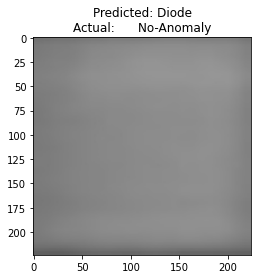

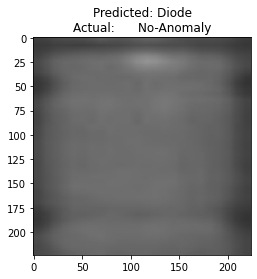

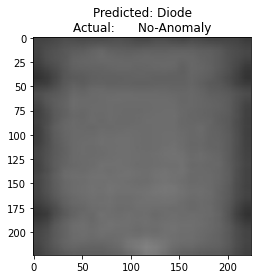

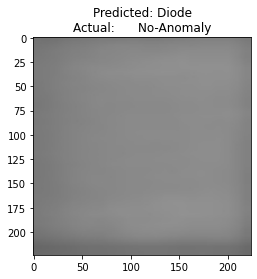

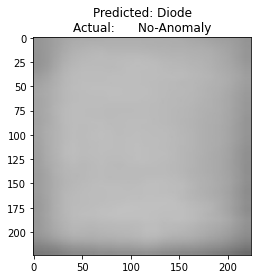

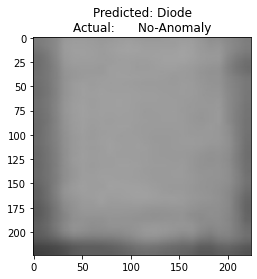

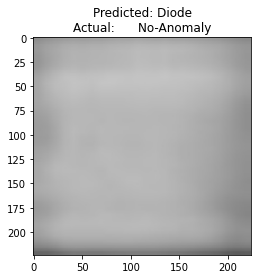

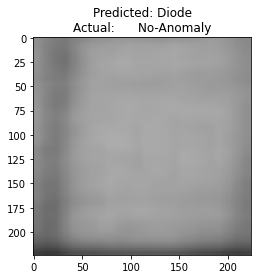

In [ ]:
Y_pred = model.predict_generator(test_subset_generator)
y_pred = np.argmax(Y_pred, axis=1)

img_nr = 0
for subdir, dirs, files in os.walk('/content/drive/MyDrive/Solar Module Diagnosis/Final Dataset/Test_Subset'):
    for file in files:
        img_file = subdir + '/' + file
        image = load_img(img_file,target_size=(img_height,img_width))
        pred_emotion = category_names[y_pred[img_nr]]
        real_emotion = category_names[test_subset_generator.classes[img_nr]]
        plt.figure()
        plt.title('Predicted: ' + pred_emotion + '\n' + 'Actual:      ' + real_emotion)
        plt.imshow(image)
        img_nr = img_nr +1